# Analyse Historical Inventory Revenue Data and Create a Dashboard

## Question 1 - Extraction of Tesla Stock Data Using yfinance

In [27]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib
import plotly.graph_objects as go
from plotly.subplots import make_subplots
print("Libraries successfully loaded!")

Libraries successfully loaded!


In [35]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [36]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [37]:
tesla_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3622,2024-11-18 00:00:00-05:00,340.730011,348.549988,330.010010,338.739990,126547500,0.0,0.0
3623,2024-11-19 00:00:00-05:00,335.760010,347.380005,332.750000,346.000000,88852500,0.0,0.0
3624,2024-11-20 00:00:00-05:00,345.000000,346.600006,334.299988,342.029999,66340700,0.0,0.0
3625,2024-11-21 00:00:00-05:00,343.809998,347.989990,335.279999,339.640015,58011700,0.0,0.0
3626,2024-11-22 00:00:00-05:00,341.089996,361.529999,337.700012,352.559998,88896400,0.0,0.0


## Question 2 - Extraction of Tesla Revenue Data Using Webscraping

In [85]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

if response.status_code == 200:
    print("Web page downloaded successfully!")
else:
    print(f"Error! HTTP Status Code: {response.status_code}")

soup = BeautifulSoup(response.content, "html.parser")

tables = soup.find_all("table")

revenue_table = None
for table in tables:
    if "Revenue" in str(table):
        revenue_table = table
        break

if revenue_table:
    rows = revenue_table.find_all("tr")
    data = []

    for row in rows[1:]:
        cols = row.find_all("td")
        
        year = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        revenue = float(revenue)

        data.append([year, revenue])

    tesla_revenue_df = pd.DataFrame(data, columns=["Year", "Revenue"])

else:
    print("Revenue table not found.")

Web page downloaded successfully!


In [86]:
tesla_revenue_df.head()

,Year,Revenue
0,2021,53823.0
1,2020,31536.0
2,2019,24578.0
3,2018,21461.0
4,2017,11759.0


In [87]:
tesla_revenue_df.tail()

,Year,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


## Question 3 - Extraction of GameStop Stock Data Using yfinance

In [88]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [89]:
gamestop_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5730,2024-11-18 00:00:00-05:00,26.650000,27.160000,25.850000,26.440001,8541600,0.0,0.0
5731,2024-11-19 00:00:00-05:00,25.889999,27.600000,25.709999,27.570000,8698600,0.0,0.0
5732,2024-11-20 00:00:00-05:00,27.260000,29.799999,27.260000,28.450001,22089700,0.0,0.0
5733,2024-11-21 00:00:00-05:00,29.090000,29.170000,27.180000,27.820000,10587200,0.0,0.0
5734,2024-11-22 00:00:00-05:00,27.879999,28.459999,27.420000,27.900000,7840900,0.0,0.0


In [90]:
gamestop_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5730,2024-11-18 00:00:00-05:00,26.650000,27.160000,25.850000,26.440001,8541600,0.0,0.0
5731,2024-11-19 00:00:00-05:00,25.889999,27.600000,25.709999,27.570000,8698600,0.0,0.0
5732,2024-11-20 00:00:00-05:00,27.260000,29.799999,27.260000,28.450001,22089700,0.0,0.0
5733,2024-11-21 00:00:00-05:00,29.090000,29.170000,27.180000,27.820000,10587200,0.0,0.0
5734,2024-11-22 00:00:00-05:00,27.879999,28.459999,27.420000,27.900000,7840900,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [91]:
url_game = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_game = requests.get(url_game)
if response_game.status_code == 200:
    print("GameStop Revenue web page downloaded successfully!")
else:
    print(f"Error! HTTP Status Code: {response_game.status_code}")
soup_game = BeautifulSoup(response_game.content, "html.parser")
tables_game = soup_game.find_all("table")
revenue_table_game = None
for table in tables_game:
    if "Revenue" in str(table):
        revenue_table_game = table
        break
if revenue_table_game:
    rows_game = revenue_table_game.find_all("tr")
    data_game = []
    for row in rows_game[1:]:
        cols_game = row.find_all("td")
        year_game = cols_game[0].text.strip()
        revenue_game = cols_game[1].text.strip().replace('$', '').replace(',', '')
        revenue_game = float(revenue_game)
        data_game.append([year_game, revenue_game])
    gamestop_revenue_df = pd.DataFrame(data_game, columns=["Year", "Revenue"])
else:
    print("Revenue table not found.")

GameStop Revenue web page downloaded successfully!


In [92]:
gamestop_revenue_df.head()

,Year,Revenue
0,2020,6466.0
1,2019,8285.0
2,2018,8547.0
3,2017,7965.0
4,2016,9364.0


In [93]:
gamestop_revenue_df.tail()

,Year,Revenue
11,2009,8806.0
12,2008,7094.0
13,2007,5319.0
14,2006,3092.0
15,2005,1843.0


In [94]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

gamestop_data['Date'] = pd.to_datetime(gamestop_data['Date'])

tesla_revenue_df['Year'] = pd.to_datetime(tesla_revenue_df['Year'], format='%Y')

gamestop_revenue_df['Year'] = pd.to_datetime(gamestop_revenue_df['Year'], format='%Y')

print("Tesla Hisse Verisi:")
print(tesla_data.head())

print("\nGameStop Hisse Verisi:")
print(gamestop_data.head())

print("\nTesla Gelir Verisi:")
print(tesla_revenue_df.head())

print("\nGameStop Gelir Verisi:")
print(gamestop_revenue_df.head())

Tesla Hisse Verisi:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  

GameStop Hisse Verisi:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670627  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.68745

## Question 5 - Tesla Stock and Revenue Dashboard

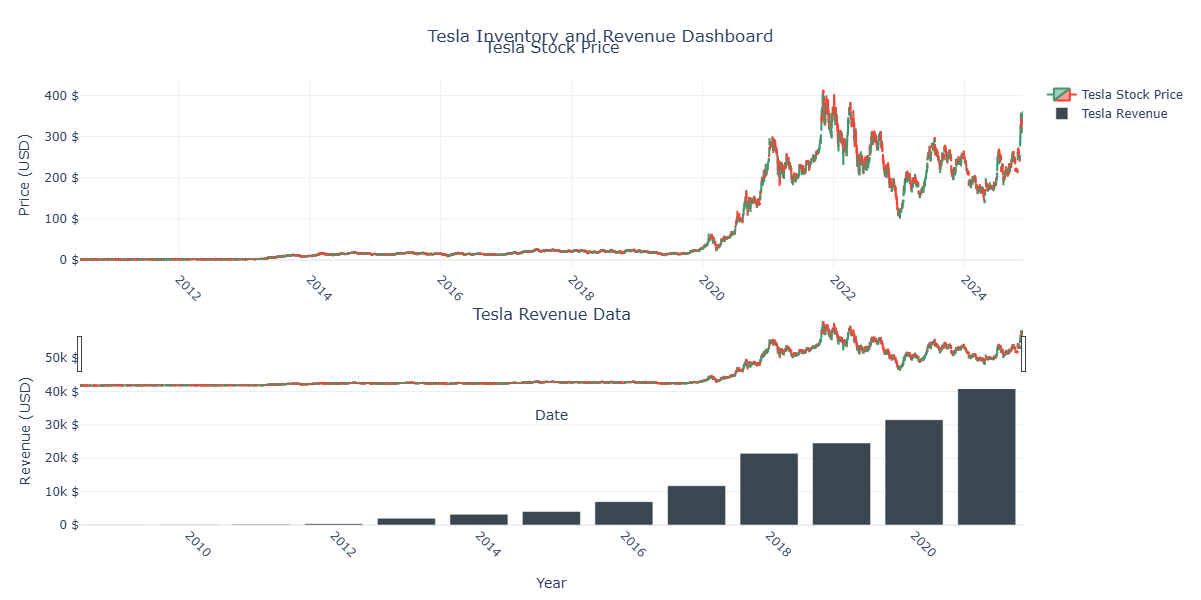

In [95]:
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Tesla Stock Price', 'Tesla Revenue Data'),
    shared_xaxes=False,
    vertical_spacing=0.15
)

fig.add_trace(
    go.Candlestick(
        x=tesla_data['Date'],
        open=tesla_data['Open'],
        high=tesla_data['High'],
        low=tesla_data['Low'],
        close=tesla_data['Close'],
        name="Tesla Stock Price"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=tesla_revenue_df['Year'],
        y=tesla_revenue_df['Revenue'],
        name="Tesla Revenue",
        marker=dict(color='rgb(58, 71, 80)')
    ),
    row=2, col=1
)

fig.update_xaxes(
    title_text='Date',
    row=1, col=1,
    tickangle=45,
    title_standoff=20
)

fig.update_xaxes(
    title_text='Year',
    row=2, col=1,
    tickangle=45,
    title_standoff=20
)

fig.update_yaxes(
    title_text='Price (USD)',
    row=1, col=1,
    ticksuffix=" $"
)

fig.update_yaxes(
    title_text='Revenue (USD)',
    row=2, col=1,
    ticksuffix=" $"
)

fig.update_layout(
    title='Tesla Inventory and Revenue Dashboard',
    title_x=0.5,
    title_y=0.95,
    showlegend=True,
    template='plotly_white',
    margin=dict(t=80, b=50),
    height=600
)

fig.layout.annotations[0].update(y=1.05)
fig.layout.annotations[1].update(y=0.45)
fig.show()

## Question 6 - GameStop Inventory and Revenue Dashboard

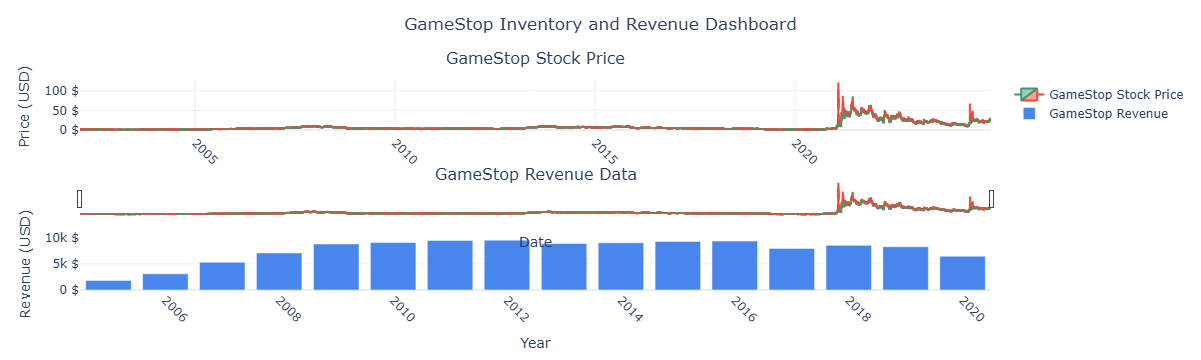

In [96]:
fig_game = make_subplots(
    rows=2, cols=1,
    subplot_titles=('GameStop Stock Price', 'GameStop Revenue Data'),
    shared_xaxes=False,
    vertical_spacing=0.5
)

fig_game.add_trace(
    go.Candlestick(
        x=gamestop_data['Date'],
        open=gamestop_data['Open'],
        high=gamestop_data['High'],
        low=gamestop_data['Low'],
        close=gamestop_data['Close'],
        name="GameStop Stock Price"
    ),
    row=1, col=1
)

fig_game.add_trace(
    go.Bar(
        x=gamestop_revenue_df['Year'],
        y=gamestop_revenue_df['Revenue'],
        name="GameStop Revenue",
        marker=dict(color='rgb(72, 133, 237)')
    ),
    row=2, col=1
)

fig_game.update_xaxes(
    title_text='Date',
    row=1, col=1,
    tickangle=45,
    title_standoff=20
)

fig_game.update_xaxes(
    title_text='Year',
    row=2, col=1,
    tickangle=45
)

fig_game.update_yaxes(
    title_text='Price (USD)',
    row=1, col=1,
    ticksuffix=" $"
)

fig_game.update_yaxes(
    title_text='Revenue (USD)',
    row=2, col=1,
    ticksuffix=" $"
)

fig_game.update_layout(
    title='GameStop Inventory and Revenue Dashboard',
    title_x=0.5,
    title_y=0.95,
    template='plotly_white',
    showlegend=True,
    margin=dict(t=80, b=50)
)

fig_game.layout.annotations[0].update(y=1.05)
fig_game.layout.annotations[1].update(y=0.50)
fig_game.show()